In [1]:
import tensorflow as tf
from pathlib import Path
from PIL import Image
import numpy
import os

In [11]:
# Create the mudkip dataset
data_dir = Path('./dataset/mudkip/')

img_height = 200
img_width = 200

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed = 258, # mudkips pokedex number
    image_size=(img_height, img_width),
    crop_to_aspect_ratio=True,
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed = 258, # mudkips pokedex number
    image_size=(img_height, img_width),
    crop_to_aspect_ratio=True,
)

class_names = train_ds.class_names


Found 13 files belonging to 4 classes.
Using 11 files for training.
Found 13 files belonging to 4 classes.
Using 2 files for validation.


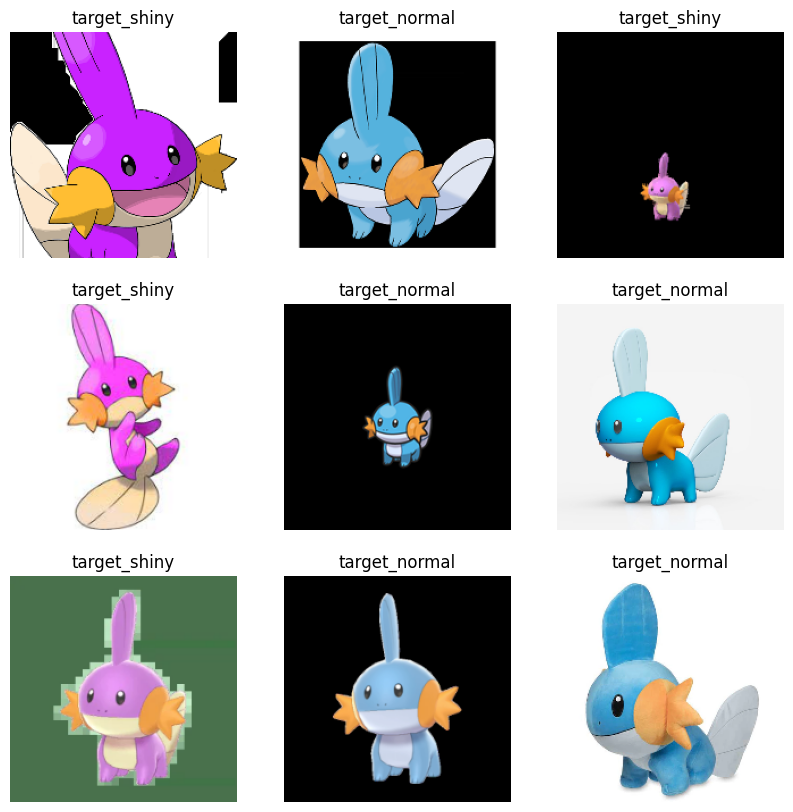

In [12]:
# Visualize the first 15 items in the dataset
# TODO: Update this to show more eventually when the datasets are bigger
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
# For output data I am thinking that it should be in this format
# [x1, x2], x1 = is it what youre looking for, x2 = is it shiny
# This is good because if you train it with multiple Pokemon
# It will be able to tell if its a shiny but not what youre hunting
output_columns = 2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(output_columns, activation='sigmoid'))
